In [1]:
import networkx as nx

In [2]:
dataset='brightkite'

In [3]:
k=3

In [4]:
k_core=nx.read_adjlist(f'k_cores/{dataset}/{k}')

In [5]:
import glob

In [6]:
import math

In [7]:
import os

In [8]:
import os.path

In [9]:
detected_communities_filepath_list = glob.glob(f'detected_communities/{dataset}/{k}/*')

In [10]:
m_values = [
    int(string_value)
    for string_value in os.listdir(f'detected_communities/{dataset}/{k}')
]

In [11]:
m_values_to_detected_communities = {}

for m_value in sorted(m_values):
    detected_community = nx.read_adjlist(f'detected_communities/{dataset}/{k}/{m_value}')
    if len(detected_community.nodes):
        m_values_to_detected_communities[m_value] = detected_community

m_values_to_detected_communities[math.inf] = k_core

In [12]:
m_values_to_detected_communities

{4: <networkx.classes.graph.Graph at 0x7f623817f150>,
 6: <networkx.classes.graph.Graph at 0x7f623817f190>,
 8: <networkx.classes.graph.Graph at 0x7f623817f050>,
 10: <networkx.classes.graph.Graph at 0x7f62381ae310>,
 12: <networkx.classes.graph.Graph at 0x7f623812a5d0>,
 14: <networkx.classes.graph.Graph at 0x7f6223fc7a90>,
 16: <networkx.classes.graph.Graph at 0x7f6223eeaf10>,
 18: <networkx.classes.graph.Graph at 0x7f6223d4dcd0>,
 20: <networkx.classes.graph.Graph at 0x7f6223be76d0>,
 22: <networkx.classes.graph.Graph at 0x7f6223a33150>,
 24: <networkx.classes.graph.Graph at 0x7f6223825350>,
 26: <networkx.classes.graph.Graph at 0x7f62235c4c10>,
 28: <networkx.classes.graph.Graph at 0x7f6223389fd0>,
 inf: <networkx.classes.graph.Graph at 0x7f62386db950>}

In [13]:
import matplotlib.pyplot as plt

In [14]:
plt.rcParams['font.size'] = 8

[Text(0, 0, '14'),
 Text(0, 0, '80'),
 Text(0, 0, '364'),
 Text(0, 0, '556'),
 Text(0, 0, '699'),
 Text(0, 0, '792'),
 Text(0, 0, '869'),
 Text(0, 0, '915'),
 Text(0, 0, '940'),
 Text(0, 0, '979'),
 Text(0, 0, '1002'),
 Text(0, 0, '1021'),
 Text(0, 0, '1033'),
 Text(0, 0, '1212')]

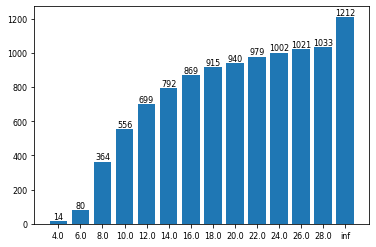

In [15]:
figure, axes=plt.subplots()

bars = axes.bar(
    x=list(range(len(m_values_to_detected_communities))),
    height=[len(g) for g in m_values_to_detected_communities.values()],
    tick_label=list(m_values_to_detected_communities.keys())
)

axes.bar_label(bars, fmt='%d')

In [16]:
figure.savefig(f'{dataset}-{k}-m_values_to_sizes.pdf')